# Outliers and Removal through IQR and Z-Score Methods
##### 1. Data Import and Exploration
#### Work Done                                            

##### Imported necessary libraries: pandas, seaborn, and matplotlib
##### Loaded the "Hitters.csv" dataset into a DataFrame
##### Displayed first 10 rows and dataset information

##### Logic
##### Understand the dataset structure, size, and data types before ##### performing any analysis.

# 2. Data Summary and Visualization
## Work Done

###### Used dataset.info() to check data types and null values
###### Used dataset.describe() to get statistical summary (mean, std, min, max, quartiles)
###### Created boxplots for columns: CAtBat, CHits, CHmRun
###### Generated distribution plot (distplot) for CAtBat

## Logic
###### Visualize data distribution and identify potential outliers using graphical methods before applying mathematical formulas.

# 3. IQR Method - Outlier Detection
## Work Done

##### Calculated Q1 (25th percentile) for CHmRun
##### Calculated Q3 (75th percentile) for CHmRun
##### Computed IQR (Interquartile Range) = Q3 - Q1
##### Set minimum range = Q1 - (1.5 × IQR)
##### Set maximum range = Q3 + (1.5 × IQR)

### Logic
### IQR Formula:

##### Any value < (Q1 - 1.5 × IQR) or > (Q3 + 1.5 × IQR) is considered an outlier
##### The 1.5 factor is a standard statistical threshold that captures extreme values


# 4. IQR Method - Outlier Removal
## Work Done

##### Filtered dataset keeping only rows where CHmRun ≤ max_range
##### Created new_dataset without outliers
##### Compared dataset shape before and after removal
##### Visualized boxplot of cleaned data

### Logic
##### Remove all rows containing outliers beyond the calculated thresholds to create a clean dataset for analysis.

# 5. Z-Score Method - Preparation
## Work Done

##### Checked for null values using dataset.isnull().sum()
##### Reviewed descriptive statistics
##### Created boxplot and distribution plot for CHmRun

### Logic
##### Verify data quality (no missing values) before applying Z-score method for consistent calculations.

# 6. Z-Score Method - Range Calculation
## Work Done

##### Calculated mean and standard deviation of CHmRun
##### Set minimum range = mean - (3 × std)
##### Set maximum range = mean + (3 × std)

### Logic
### Z-Score Formula:

##### Values outside ±3 standard deviations are extreme outliers
##### The 3-sigma rule captures ~99.7% of normal data
##### Values beyond are considered statistical outliers


# 7. Z-Score Method - Outlier Removal
## Work Done

##### Filtered dataset keeping only rows where CHmRun ≤ max_range
##### Created new_dataset_z_method without outliers
##### Visualized boxplot of cleaned data

### Logic
##### Apply the Z-score threshold to remove extreme values from the dataset.

# 8. Z-Score Calculation and Filtering
## Work Done

##### Calculated Z-score for each value: (value - mean) / std
##### Added z_score column to dataset
##### Identified rows where z_score > 3 (boolean mask)
##### Filtered dataset to keep only rows where z_score < 3

### Logic
##### Standardize outlier detection by converting values to Z-scores. Values with |Z-score| > 3 are statistical outliers and flagged for removal.

# Summary: 
## IQR     vs     Z-Score Method
## Aspect  ------------       IQR Method -------    Z-Score Method
##### Threshold -------------------- 1.5 × IQR ----------------------     3 × Standard Deviation
##### Use Case ---------------    Non-normal distributions -----------------  Normal/Gaussian distributions
##### Sensitivity --------------    More sensitive to outliers ---------------- Less sensitive (removes extreme values only)
##### Calculation --------------   Based on quartiles -----------------  Based on standard deviation

## Key Takeaway
##### Both methods effectively identify and remove outliers, but they work differently:

## IQR: Better for skewed data
## Z-Score: Better for normally distributed data

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
dataset = pd.read_csv("Hitters.csv")
dataset.head(10)

,Unnamed: 0,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,-Andy Allanson,293,66,1,30,29,14,1,293,66,...,30,29,14,A,E,446,33,20,NaN,A
1,-Alan Ashby,315,81,7,24,38,39,14,3449,835,...,321,414,375,N,W,632,43,10,475.0,N
2,-Alvin Davis,479,130,18,66,72,76,3,1624,457,...,224,266,263,A,W,880,82,14,480.0,A
3,-Andre Dawson,496,141,20,65,78,37,11,5628,1575,...,828,838,354,N,E,200,11,3,500.0,N
4,-Andres Galarraga,321,87,10,39,42,30,2,396,101,...,48,46,33,N,E,805,40,4,91.5,N
5,-Alfredo Griffin,594,169,4,74,51,35,11,4408,1133,...,501,336,194,A,W,282,421,25,750.0,A
6,-Al Newman,185,37,1,23,8,21,2,214,42,...,30,9,24,N,E,76,127,7,70.0,A
7,-Argenis Salazar,298,73,0,24,24,7,3,509,108,...,41,37,12,A,W,121,283,9,100.0,A
8,-Andres Thomas,323,81,6,26,32,8,2,341,86,...,32,34,8,N,W,143,290,19,75.0,N
9,-Andre Thornton,401,92,17,49,66,65,13,5206,1332,...,784,890,866,A,E,0,0,0,1100.0,A


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  322 non-null    object 
 1   AtBat       322 non-null    int64  
 2   Hits        322 non-null    int64  
 3   HmRun       322 non-null    int64  
 4   Runs        322 non-null    int64  
 5   RBI         322 non-null    int64  
 6   Walks       322 non-null    int64  
 7   Years       322 non-null    int64  
 8   CAtBat      322 non-null    int64  
 9   CHits       322 non-null    int64  
 10  CHmRun      322 non-null    int64  
 11  CRuns       322 non-null    int64  
 12  CRBI        322 non-null    int64  
 13  CWalks      322 non-null    int64  
 14  League      322 non-null    object 
 15  Division    322 non-null    object 
 16  PutOuts     322 non-null    int64  
 17  Assists     322 non-null    int64  
 18  Errors      322 non-null    int64  
 19  Salary      263 non-null    f

In [5]:
dataset.describe()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
count,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.00000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,263.000000
mean,380.928571,101.024845,10.770186,50.909938,48.027950,38.742236,7.444099,2648.68323,717.571429,69.490683,358.795031,330.118012,260.239130,288.937888,106.913043,8.040373,535.925882
std,153.404981,46.454741,8.709037,26.024095,26.166895,21.639327,4.926087,2324.20587,654.472627,86.266061,334.105886,333.219617,267.058085,280.704614,136.854876,6.368359,451.118681
min,16.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,19.00000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67.500000
25%,255.250000,64.000000,4.000000,30.250000,28.000000,22.000000,4.000000,816.75000,209.000000,14.000000,100.250000,88.750000,67.250000,109.250000,7.000000,3.000000,190.000000
50%,379.500000,96.000000,8.000000,48.000000,44.000000,35.000000,6.000000,1928.00000,508.000000,37.500000,247.000000,220.500000,170.500000,212.000000,39.500000,6.000000,425.000000
75%,512.000000,137.000000,16.000000,69.000000,64.750000,53.000000,11.000000,3924.25000,1059.250000,90.000000,526.250000,426.250000,339.250000,325.000000,166.000000,11.000000,750.000000
max,687.000000,238.000000,40.000000,130.000000,121.000000,105.000000,24.000000,14053.00000,4256.000000,548.000000,2165.000000,1659.000000,1566.000000,1378.000000,492.000000,32.000000,2460.000000


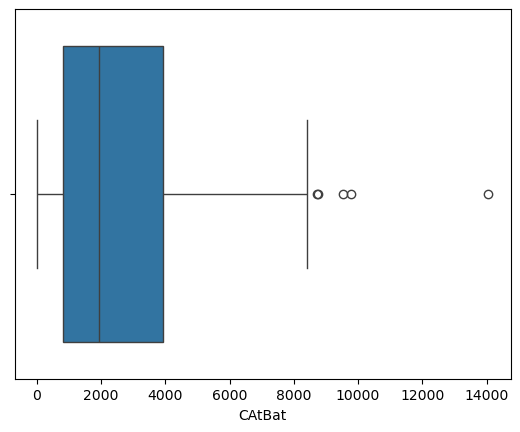

In [6]:
sns.boxplot(x="CAtBat", data=dataset)
plt.show()

C:\Users\pts\AppData\Local\Temp\ipykernel_14068\1988384025.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["CAtBat"])


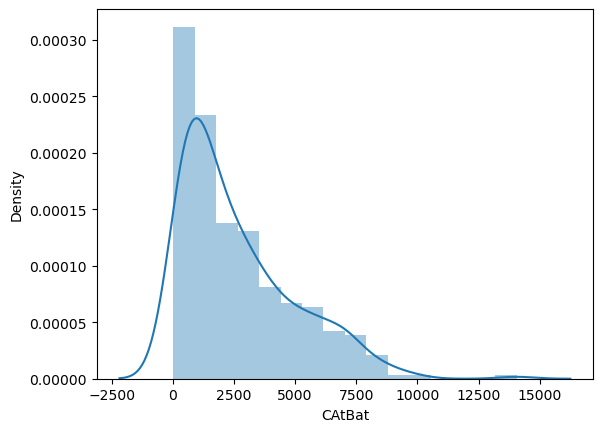

In [7]:
sns.distplot(dataset["CAtBat"])
plt.show()

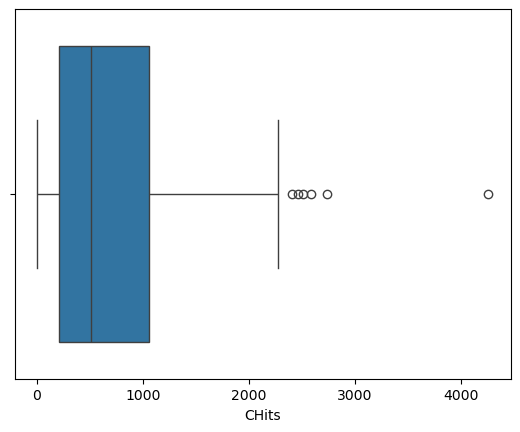

In [8]:
sns.boxplot(x="CHits", data=dataset)
plt.show()

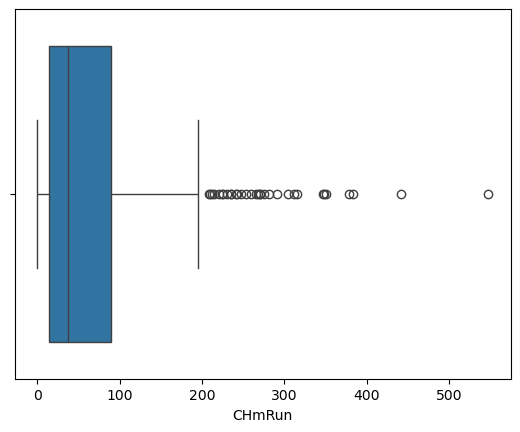

In [7]:
sns.boxplot(x="CHmRun", data=dataset)
plt.show()

# Removal of Outliers through IQR method,..........

In [10]:
dataset.shape

(322, 21)

In [14]:
q1 = dataset["CHmRun"].quantile(0.25)
q1

14.0

In [15]:
q3 = dataset["CHmRun"].quantile(0.75)
q3

90.0

In [26]:
### Finding IQR

# Outliers removing using IQR method..

In [17]:
IQR = q3-q1
min_range = q1-(1.5*IQR)
max_range = q3+(1.5*IQR)
min_range,max_range

(-100.0, 204.0)

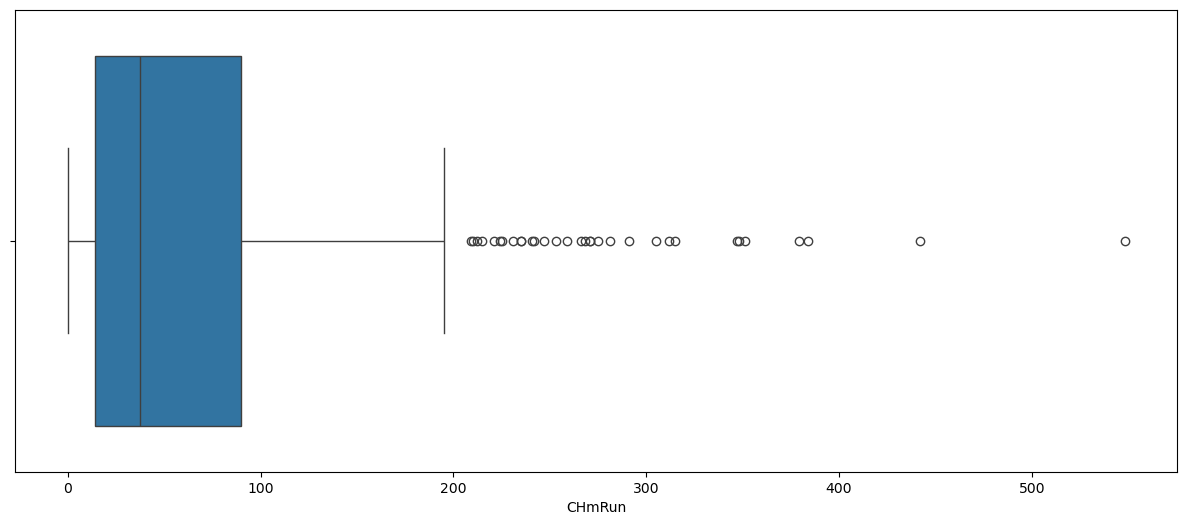

In [19]:
plt.figure(figsize=(15,6))
sns.boxplot(x="CHmRun", data=dataset)
plt.show()

In [20]:
dataset

,Unnamed: 0,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,-Andy Allanson,293,66,1,30,29,14,1,293,66,...,30,29,14,A,E,446,33,20,NaN,A
1,-Alan Ashby,315,81,7,24,38,39,14,3449,835,...,321,414,375,N,W,632,43,10,475.0,N
2,-Alvin Davis,479,130,18,66,72,76,3,1624,457,...,224,266,263,A,W,880,82,14,480.0,A
3,-Andre Dawson,496,141,20,65,78,37,11,5628,1575,...,828,838,354,N,E,200,11,3,500.0,N
4,-Andres Galarraga,321,87,10,39,42,30,2,396,101,...,48,46,33,N,E,805,40,4,91.5,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,-Willie McGee,497,127,7,65,48,37,5,2703,806,...,379,311,138,N,E,325,9,3,700.0,N
318,-Willie Randolph,492,136,5,76,50,94,12,5511,1511,...,897,451,875,A,E,313,381,20,875.0,A
319,-Wayne Tolleson,475,126,3,61,43,52,6,1700,433,...,217,93,146,A,W,37,113,7,385.0,A
320,-Willie Upshaw,573,144,9,85,60,78,8,3198,857,...,470,420,332,A,E,1314,131,12,960.0,A


In [22]:
new_dataset = dataset[dataset["CHmRun"]<=max_range]
new_dataset

,Unnamed: 0,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,-Andy Allanson,293,66,1,30,29,14,1,293,66,...,30,29,14,A,E,446,33,20,NaN,A
1,-Alan Ashby,315,81,7,24,38,39,14,3449,835,...,321,414,375,N,W,632,43,10,475.0,N
2,-Alvin Davis,479,130,18,66,72,76,3,1624,457,...,224,266,263,A,W,880,82,14,480.0,A
4,-Andres Galarraga,321,87,10,39,42,30,2,396,101,...,48,46,33,N,E,805,40,4,91.5,N
5,-Alfredo Griffin,594,169,4,74,51,35,11,4408,1133,...,501,336,194,A,W,282,421,25,750.0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,-Willie McGee,497,127,7,65,48,37,5,2703,806,...,379,311,138,N,E,325,9,3,700.0,N
318,-Willie Randolph,492,136,5,76,50,94,12,5511,1511,...,897,451,875,A,E,313,381,20,875.0,A
319,-Wayne Tolleson,475,126,3,61,43,52,6,1700,433,...,217,93,146,A,W,37,113,7,385.0,A
320,-Willie Upshaw,573,144,9,85,60,78,8,3198,857,...,470,420,332,A,E,1314,131,12,960.0,A


In [23]:
new_dataset.shape

(290, 21)

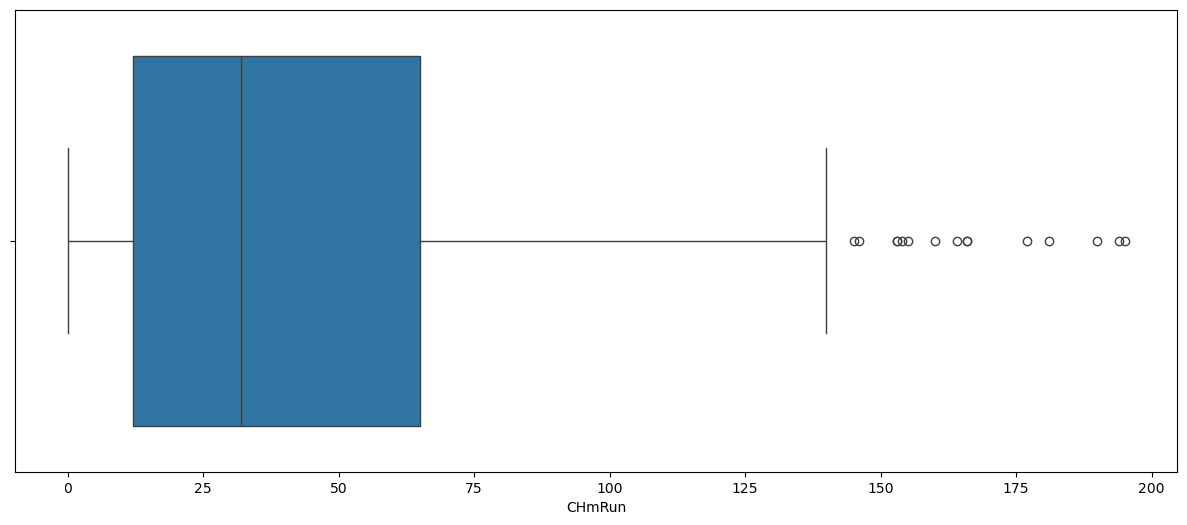

In [25]:
plt.figure(figsize=(15,6))
sns.boxplot(x="CHmRun", data=new_dataset)
plt.show()

# Outliers Removing Z-Score Method...

In [27]:
dataset.isnull().sum()

Unnamed: 0     0
AtBat          0
Hits           0
HmRun          0
Runs           0
RBI            0
Walks          0
Years          0
CAtBat         0
CHits          0
CHmRun         0
CRuns          0
CRBI           0
CWalks         0
League         0
Division       0
PutOuts        0
Assists        0
Errors         0
Salary        59
NewLeague      0
dtype: int64

In [28]:
dataset.describe()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
count,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.00000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,263.000000
mean,380.928571,101.024845,10.770186,50.909938,48.027950,38.742236,7.444099,2648.68323,717.571429,69.490683,358.795031,330.118012,260.239130,288.937888,106.913043,8.040373,535.925882
std,153.404981,46.454741,8.709037,26.024095,26.166895,21.639327,4.926087,2324.20587,654.472627,86.266061,334.105886,333.219617,267.058085,280.704614,136.854876,6.368359,451.118681
min,16.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,19.00000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67.500000
25%,255.250000,64.000000,4.000000,30.250000,28.000000,22.000000,4.000000,816.75000,209.000000,14.000000,100.250000,88.750000,67.250000,109.250000,7.000000,3.000000,190.000000
50%,379.500000,96.000000,8.000000,48.000000,44.000000,35.000000,6.000000,1928.00000,508.000000,37.500000,247.000000,220.500000,170.500000,212.000000,39.500000,6.000000,425.000000
75%,512.000000,137.000000,16.000000,69.000000,64.750000,53.000000,11.000000,3924.25000,1059.250000,90.000000,526.250000,426.250000,339.250000,325.000000,166.000000,11.000000,750.000000
max,687.000000,238.000000,40.000000,130.000000,121.000000,105.000000,24.000000,14053.00000,4256.000000,548.000000,2165.000000,1659.000000,1566.000000,1378.000000,492.000000,32.000000,2460.000000


<Axes: xlabel='CHmRun'>

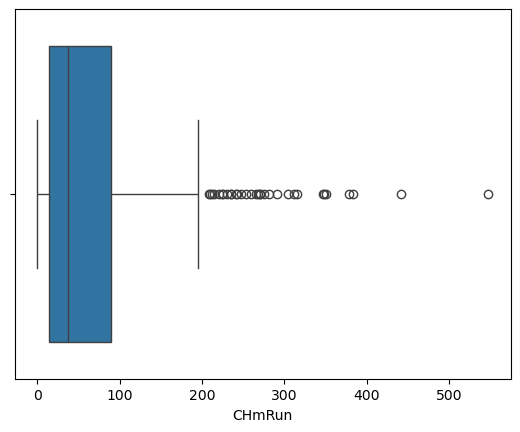

In [31]:
sns.boxplot(x = dataset["CHmRun"], data=dataset)

C:\Users\pts\AppData\Local\Temp\ipykernel_14068\2738840981.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["CHmRun"])


<Axes: xlabel='CHmRun', ylabel='Density'>

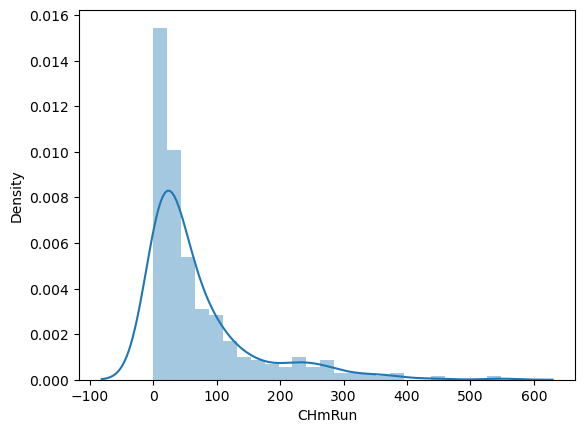

In [37]:
sns.distplot(dataset["CHmRun"])

In [38]:
min_range = dataset["CHmRun"].mean()-(3*dataset["CHmRun"].std())
max_range = dataset["CHmRun"].mean()+(3*dataset["CHmRun"].std())

In [39]:
min_range, max_range

(-189.30749917560115, 328.2888656352285)

In [40]:
new_dataset_z_method = dataset[dataset["CHmRun"]<=max_range]
new_dataset_z_method

,Unnamed: 0,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,-Andy Allanson,293,66,1,30,29,14,1,293,66,...,30,29,14,A,E,446,33,20,NaN,A
1,-Alan Ashby,315,81,7,24,38,39,14,3449,835,...,321,414,375,N,W,632,43,10,475.0,N
2,-Alvin Davis,479,130,18,66,72,76,3,1624,457,...,224,266,263,A,W,880,82,14,480.0,A
3,-Andre Dawson,496,141,20,65,78,37,11,5628,1575,...,828,838,354,N,E,200,11,3,500.0,N
4,-Andres Galarraga,321,87,10,39,42,30,2,396,101,...,48,46,33,N,E,805,40,4,91.5,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,-Willie McGee,497,127,7,65,48,37,5,2703,806,...,379,311,138,N,E,325,9,3,700.0,N
318,-Willie Randolph,492,136,5,76,50,94,12,5511,1511,...,897,451,875,A,E,313,381,20,875.0,A
319,-Wayne Tolleson,475,126,3,61,43,52,6,1700,433,...,217,93,146,A,W,37,113,7,385.0,A
320,-Willie Upshaw,573,144,9,85,60,78,8,3198,857,...,470,420,332,A,E,1314,131,12,960.0,A


<Axes: xlabel='CHmRun'>

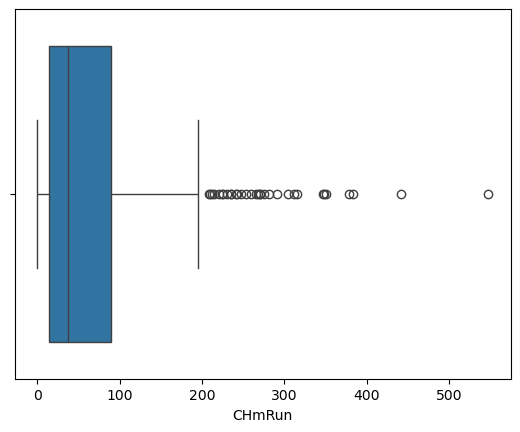

In [41]:
sns.boxplot(x = dataset["CHmRun"], data=new_dataset_z_method)

In [44]:
z_score = (dataset["CHmRun"] - dataset["CHmRun"].mean())/(dataset["CHmRun"].std())
z_score

0     -0.793947
1     -0.005688
2     -0.075240
3      1.802671
4     -0.666435
         ...   
317   -0.434594
318   -0.353449
319   -0.724395
320    0.318889
321   -0.457778
Name: CHmRun, Length: 322, dtype: float64

In [45]:
z_score>3

0      False
1      False
2      False
3      False
4      False
       ...  
317    False
318    False
319    False
320    False
321    False
Name: CHmRun, Length: 322, dtype: bool

In [48]:
dataset["z_score"] = z_score

In [49]:
dataset

,Unnamed: 0,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague,z_score
0,-Andy Allanson,293,66,1,30,29,14,1,293,66,...,29,14,A,E,446,33,20,NaN,A,-0.793947
1,-Alan Ashby,315,81,7,24,38,39,14,3449,835,...,414,375,N,W,632,43,10,475.0,N,-0.005688
2,-Alvin Davis,479,130,18,66,72,76,3,1624,457,...,266,263,A,W,880,82,14,480.0,A,-0.075240
3,-Andre Dawson,496,141,20,65,78,37,11,5628,1575,...,838,354,N,E,200,11,3,500.0,N,1.802671
4,-Andres Galarraga,321,87,10,39,42,30,2,396,101,...,46,33,N,E,805,40,4,91.5,N,-0.666435
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,-Willie McGee,497,127,7,65,48,37,5,2703,806,...,311,138,N,E,325,9,3,700.0,N,-0.434594
318,-Willie Randolph,492,136,5,76,50,94,12,5511,1511,...,451,875,A,E,313,381,20,875.0,A,-0.353449
319,-Wayne Tolleson,475,126,3,61,43,52,6,1700,433,...,93,146,A,W,37,113,7,385.0,A,-0.724395
320,-Willie Upshaw,573,144,9,85,60,78,8,3198,857,...,420,332,A,E,1314,131,12,960.0,A,0.318889


In [50]:
dataset[dataset["z_score"]<3]

,Unnamed: 0,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague,z_score
0,-Andy Allanson,293,66,1,30,29,14,1,293,66,...,29,14,A,E,446,33,20,NaN,A,-0.793947
1,-Alan Ashby,315,81,7,24,38,39,14,3449,835,...,414,375,N,W,632,43,10,475.0,N,-0.005688
2,-Alvin Davis,479,130,18,66,72,76,3,1624,457,...,266,263,A,W,880,82,14,480.0,A,-0.075240
3,-Andre Dawson,496,141,20,65,78,37,11,5628,1575,...,838,354,N,E,200,11,3,500.0,N,1.802671
4,-Andres Galarraga,321,87,10,39,42,30,2,396,101,...,46,33,N,E,805,40,4,91.5,N,-0.666435
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,-Willie McGee,497,127,7,65,48,37,5,2703,806,...,311,138,N,E,325,9,3,700.0,N,-0.434594
318,-Willie Randolph,492,136,5,76,50,94,12,5511,1511,...,451,875,A,E,313,381,20,875.0,A,-0.353449
319,-Wayne Tolleson,475,126,3,61,43,52,6,1700,433,...,93,146,A,W,37,113,7,385.0,A,-0.724395
320,-Willie Upshaw,573,144,9,85,60,78,8,3198,857,...,420,332,A,E,1314,131,12,960.0,A,0.318889
